# Week 1.1: Introduction to Networks

## 0: Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## 1: Graph Making

The 4 types of graphs provided in NetworkX are:

* __Graph__: Undirected graph.It ignores multiple edges between two nodes. It does allow self-loop
edges between a node and itself.
* __MultiGraph__: A flexible graph class that allows multiple undirected edges between pairs of nodes.
* __DiGraph__: Directed graph.
* __MultiDiGraph__: A directed version of a MultiGraph.
    
    
    
    
|NetworkxClass|Typee|Self-Loops Allowed|Parallel-edges Allowed|
|:-----------:|:---:|:----------------:|:--------------------:|
|Graph|Undirected|Yes|No|
|MultiGraph|Undirected|Yes|Yes|
|DiGraph|Directed|Yes|No|
|MultiDiGraph|Directed|Yes|Yes|

### 1.1: Graph (Edge List)

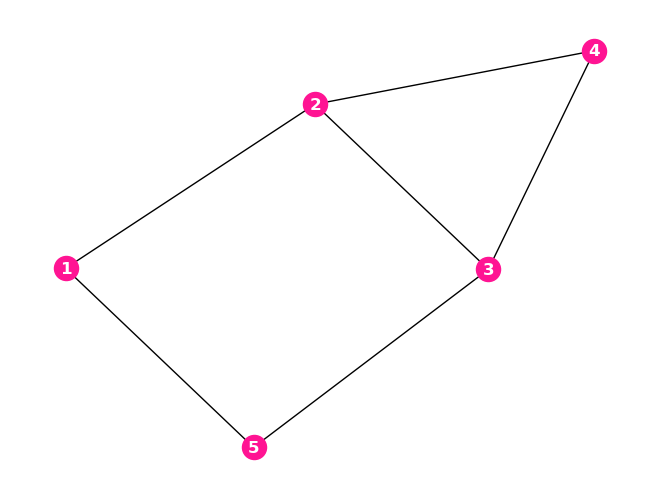

In [4]:
#(1) Plot

#Create empty graph
g1=nx.Graph()

#Add edges linking nodes:
g1.add_edges_from([(1, 2), (2, 3), (2,4), (3,4), (3,5), (1,5)])

#Extension: String format nodes
#g1l.add_edges_from([('a', 'b'), ('b', 'c'), ('b','d'), ('c','d')])

#Plot the graph
nx.draw(g1,
        with_labels = True,
        node_color='deeppink',
        font_color="white",
        font_weight='bold')

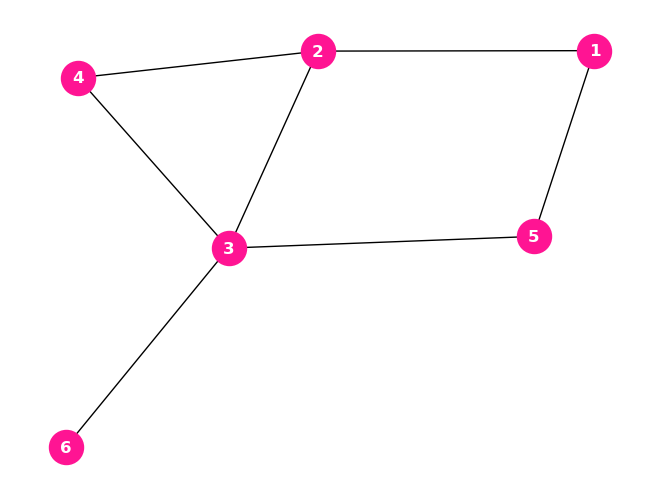

In [5]:
#Add an edge
g1.add_edges_from([(3,6)])

#Replot
nx.draw(g1,
        with_labels = True,
        node_color='deeppink',
        node_size=600,
        font_color="white",
        font_weight='bold')

In [29]:
#(2) Nodes 
print(g1)
list(g1.nodes)

Graph with 6 nodes and 7 edges


[1, 2, 3, 4, 5, 6]

In [30]:
#(3) Edges 
list(g1.edges)

[(1, 2), (1, 5), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6)]

In [11]:
#(4) Adjacency 

#(4a) Print Adjacency Matrix
adj_A1 = nx.adjacency_matrix(g1)

#(4b) Adjacent Vertices (e.g., of Node 2)
print(adj_A1.todense())
list(g1.adj[2])

[[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]


[1, 3, 4]

In [39]:
#(5) Degree of Node

#(5a) Print Degree
deg=nx.degree(g1)
deg

DegreeView({1: 2, 2: 3, 3: 4, 4: 2, 5: 2, 6: 1})

In [ ]:
#(5b) Degree for Specific Node (e.g., of Node 4)
g1.degree[4]  

In [19]:
#(6) Diameter
nx.diameter(g1)

3

[1, 2, 3, 6]
[(1, 2), (2, 3), (3, 6)]


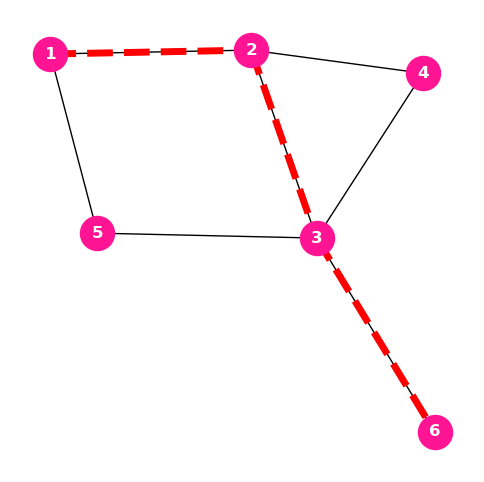

In [20]:
#(7) Shortest Path

#Print shortest path from 1 to 6
sh_path_nodes = nx.shortest_path(g1,source=1,target=6)
print(sh_path_nodes)

sh_path_edges = list(zip(sh_path_nodes,sh_path_nodes[1:]))
print(sh_path_edges)

#Plot shortest path from 1 to 6
pos = nx.spring_layout(g1)
fig,ax=plt.subplots(1,1,figsize=(6,6))
nx.draw(g1,
        pos = pos,
        with_labels = True,
        node_color='deeppink',
        node_size=600,
        font_color="white",
        font_weight='bold')
        

nx.draw_networkx_edges(g1,pos=pos,edgelist=sh_path_edges,edge_color='red',style="dashed", width=5)
plt.show()

### 1.2: Multigraph (Edge List)

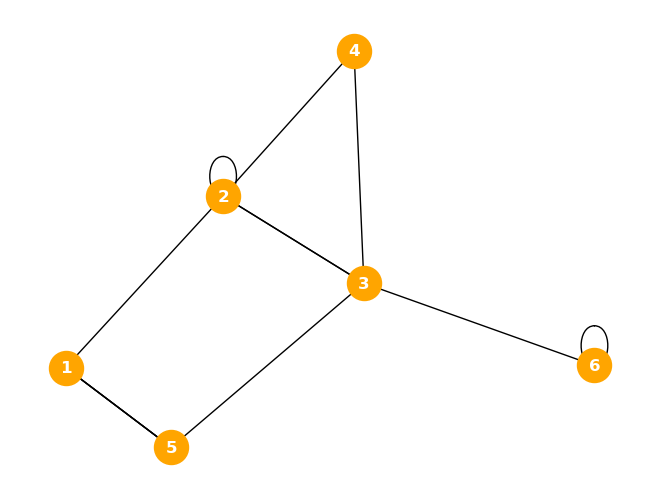

In [24]:
#(1) Plot

#Create empty graph
g2=nx.MultiGraph()

#Add edges linking nodes:
g2.add_edges_from([(1,2), (2,2), (2,3), (2,3), (2,4), (3,4), 
                   (3,5), (1,5), (1,5), (5,1), (3,6), (6,6)])

#Plot the graph
nx.draw(g2,
        with_labels = True,
        node_color='orange',
        node_size=600,
        font_color="white",
        font_weight='bold')

In [27]:
#(2) Nodes 
print(g2)
list(g2.nodes)

MultiGraph with 6 nodes and 12 edges


[1, 2, 3, 4, 5, 6]

In [64]:
#(3) Edges 

#(3a) List of Edges
list(g2.edges)

#Comment: The third value represents the number of edges between the pair of...
#...nodes, where 0 represents the first edge. For example, there are (1,5,0)...
#...(1,5,1), and (1,5,2), which means there are three edges between 1 and 5

[(1, 2, 0),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (2, 2, 0),
 (2, 3, 0),
 (2, 3, 1),
 (2, 4, 0),
 (3, 4, 0),
 (3, 5, 0),
 (3, 6, 0),
 (6, 6, 0)]

In [34]:
#(3b) Specific Edges
g2.number_of_edges(1,5)

3

In [36]:
sl=nx.number_of_selfloops(g2)
print(sl)
list(nx.selfloop_edges(g2))

2


[(2, 2), (6, 6)]

In [37]:
#(4) Adjacency
adj_A2 = nx.adjacency_matrix(g2)
print(adj_A2.todense())

[[0 1 0 0 3 0]
 [1 1 2 1 0 0]
 [0 2 0 1 1 1]
 [0 1 1 0 0 0]
 [3 0 1 0 0 0]
 [0 0 1 0 0 1]]


In [44]:
#(5) Degree of Node
deg=nx.degree(g2)
deg

#Comment: Although there is only one edge between all pairs of nodes, the single...
#...edge on plot can represent multiple edges.

#Example:
#Point 1: (1,2);(1,5);(1,5);(5,1)
#Point 2: (1,2), (2,2), (2,3), (2,3), (2,4)

MultiDegreeView({1: 4, 2: 6, 3: 5, 4: 2, 5: 4, 6: 3})

In [45]:
#(6) Diameter
nx.diameter(g2)

3

### 1.3: Multigraph (Adjacency Matrix)

In [72]:
#(1) Original Matrix
import numpy as np
adj_A=np.array([[0,1,0,0,3,0],
            [1,1,2,1,0,0],
            [0,2,0,1,1,1],
            [0,1,1,0,0,0],
            [3,0,1,0,0,0],
            [0,0,1,0,0,1],])
print(adj_A)

[[0 1 0 0 3 0]
 [1 1 2 1 0 0]
 [0 2 0 1 1 1]
 [0 1 1 0 0 0]
 [3 0 1 0 0 0]
 [0 0 1 0 0 1]]


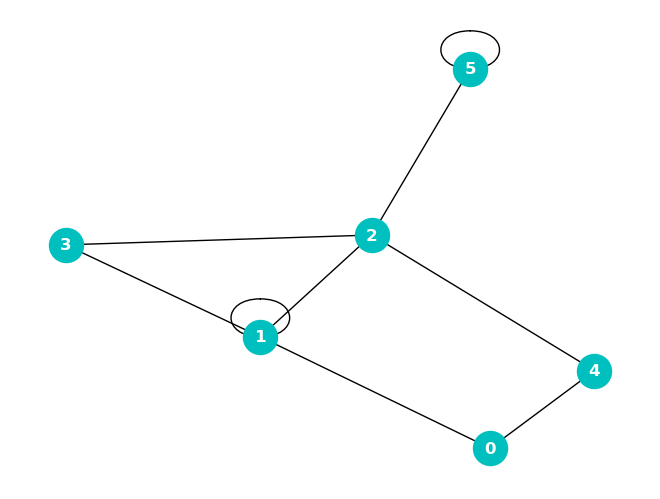

In [55]:
#(2) Plot
g3 = nx.MultiGraph(np.array(adj_A))
nx.draw(g3,
        with_labels = True,
        node_color='c',
        node_size=600,
        font_color="white",
        font_weight='bold')

In [56]:
#(3) Node Rename
list(g3.nodes)

[0, 1, 2, 3, 4, 5]

In [57]:
labels={0:1, 1:2, 2:3, 3:4, 4:5, 5:6}
g3 = nx.relabel_nodes(g3, labels)

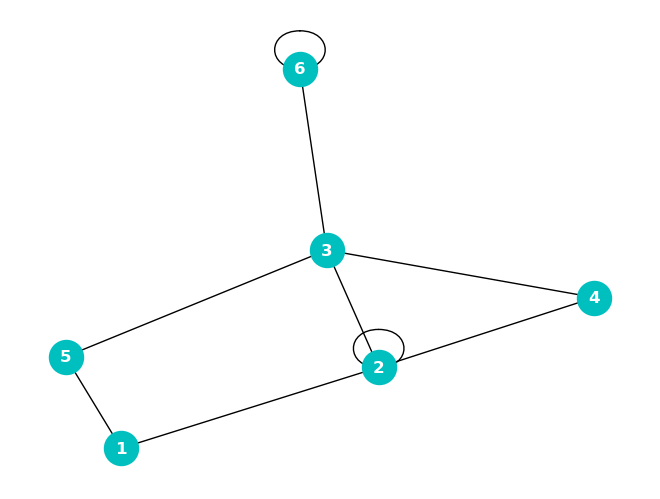

In [58]:
nx.draw(g3,
        with_labels = True,
        node_color='c',
        node_size=600,
        font_color="white",
        font_weight='bold')

In [59]:
list(g3.nodes)

[1, 2, 3, 4, 5, 6]

In [60]:
#(4) Edge 

#(4a) List Edges
list(g3.edges(data = True))

[(1, 2, {'weight': 1}),
 (1, 5, {'weight': 3}),
 (2, 2, {'weight': 1}),
 (2, 3, {'weight': 2}),
 (2, 4, {'weight': 1}),
 (3, 4, {'weight': 1}),
 (3, 5, {'weight': 1}),
 (3, 6, {'weight': 1}),
 (6, 6, {'weight': 1})]

In [65]:
#(4b) Count Edges
g3.number_of_edges()

9

In [66]:
sl=nx.number_of_selfloops(g3)
print(sl)

2


In [67]:
list(nx.selfloop_edges(g3))

[(2, 2), (6, 6)]

In [68]:
g3.number_of_edges(1,5)

1

In [69]:
#(5) Adjacency Matrix
adj_A3 = nx.adjacency_matrix(g3)
print(adj_A3.todense())

[[0 1 0 0 3 0]
 [1 1 2 1 0 0]
 [0 2 0 1 1 1]
 [0 1 1 0 0 0]
 [3 0 1 0 0 0]
 [0 0 1 0 0 1]]


In [70]:
#(6) Degree of Node
deg=nx.degree(g3)
deg

MultiDegreeView({1: 2, 2: 5, 3: 4, 4: 2, 5: 2, 6: 3})

In [71]:
#(7) Diameter
nx.diameter(g3)

3

### 1.4: Weighted Graph (Adjacency Matrix)

In [73]:
#(1) Original Matrix
g4 = nx.Graph(np.array(adj_A))

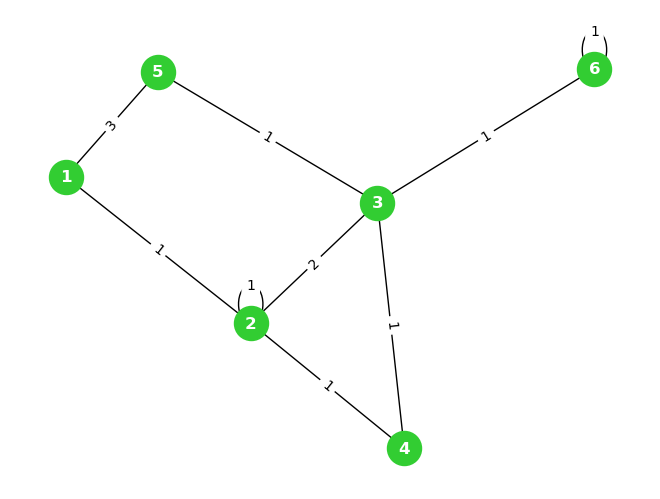

In [74]:
#(2) Plot

#Relabel the nodes
labels={0:1, 1:2, 2:3, 3:4, 4:5, 5:6}
g4 = nx.relabel_nodes(g4, labels)

label_weight = nx.get_edge_attributes(g4, "weight")

#'pos' = position of the nodes
pos = nx.spring_layout(g4)
nx.draw(g4,
        pos,
        with_labels = True,
        node_color='limegreen',
        node_size=600,
        font_color="white",
        font_weight='bold')

nx.draw_networkx_edge_labels(g4,pos=pos,edge_labels=label_weight)
plt.show()

In [75]:
#(3) Edge

#(3a) Edge List
list(g4.edges(data = True))

[(1, 2, {'weight': 1}),
 (1, 5, {'weight': 3}),
 (2, 2, {'weight': 1}),
 (2, 3, {'weight': 2}),
 (2, 4, {'weight': 1}),
 (3, 4, {'weight': 1}),
 (3, 5, {'weight': 1}),
 (3, 6, {'weight': 1}),
 (6, 6, {'weight': 1})]

In [76]:
#(3b) Specific Edge
print(g4.edges[1,5]['weight'])

3


In [77]:
#(3c) Number of Edges
g4.number_of_edges(1,5)

1

In [78]:
#(4) Adjacency Matrix

#(4a) Weighted Adjacency Matrix
adj_A4 = nx.adjacency_matrix(g4)
print(adj_A4.todense())

[[0 1 0 0 3 0]
 [1 1 2 1 0 0]
 [0 2 0 1 1 1]
 [0 1 1 0 0 0]
 [3 0 1 0 0 0]
 [0 0 1 0 0 1]]


In [79]:
#(4b) Unweighted Adjacency Matrix
adj_A4 = nx.adjacency_matrix(g4,weight=None)
print(adj_A4.todense())

[[0 1 0 0 1 0]
 [1 1 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 1]]


In [80]:
#(5) Degree of Node

#(5a) Unweighted Degree of Node
deg=nx.degree(g4)
deg

DegreeView({1: 2, 2: 5, 3: 4, 4: 2, 5: 2, 6: 3})

In [81]:
#(5b) Weighted Degree of Node
deg=nx.degree(g4, weight="weight")
deg

DegreeView({1: 4, 2: 6, 3: 5, 4: 2, 5: 4, 6: 3})

In [82]:
#(6) Diameter

#(6a) Unweighted Diameter
nx.diameter(g4)

3

In [127]:
#(6b) Weighted Diameter
nlen={}

for n in g4.nodes():
    a=nx.single_source_dijkstra_path_length(g4, n)
    print(a)
    nlen[n]=a
e = nx.eccentricity(g4,sp=nlen)
d = nx.diameter(g4, e)
#Comment:

#(a) nx.single_source_dijkstra_path_length(): To compute the shortest...
#...path length between a node and every other reachable node...
#...considering the weights of the links. Each row represents...
#...a source node.

#(e) Eccentricity: The maximum shortest-path distance from each node...
#...to all other nodes, considering "nlen" which are the weighted distances.

#(d) Diameter: The maximum eccentricity in the graph.

{1: 0, 2: 1, 4: 2, 5: 3, 3: 3, 6: 4}
{2: 0, 1: 1, 4: 1, 3: 2, 5: 3, 6: 3}
{3: 0, 4: 1, 5: 1, 6: 1, 2: 2, 1: 3}
{4: 0, 2: 1, 3: 1, 1: 2, 5: 2, 6: 2}
{5: 0, 3: 1, 4: 2, 6: 2, 1: 3, 2: 3}
{6: 0, 3: 1, 4: 2, 5: 2, 2: 3, 1: 4}


In [128]:
#(e) Eccentricity

e

{1: 4, 2: 3, 3: 3, 4: 2, 5: 3, 6: 4}

In [129]:
#(d) Diameter

d

4

### 1.5: DiGraph (Edge List)

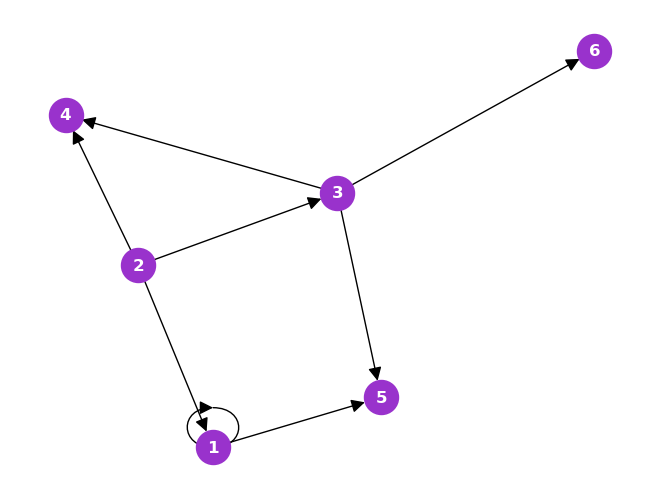

In [84]:
#(1) Original Matrix
g5=nx.DiGraph()
g5.add_edges_from([(1,1), (2,1), (2,3), (2,4), (3,4), (3,5), (1,5), (3,6)])

#(2) Plot
pos = nx.spring_layout(g4)
nx.draw(g5,
        pos,
        with_labels = True,
        node_color='darkorchid',
        node_size=600,
        font_color="white",
        font_weight='bold',
       arrowsize=20)

In [85]:
#(3) Edge
list(g5.edges)

[(1, 1), (1, 5), (2, 1), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6)]

In [86]:
#(4) Adjacency Matrix
adj_A5 = nx.adjacency_matrix(g5)
print(adj_A5.todense())

#Comment: A_ij=1 if there's a link from i to j instead of from j to i as in Newman's book

[[1 0 0 0 1 0]
 [1 0 1 1 0 0]
 [0 0 0 1 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [87]:
#(5) Degree of Node

#(5a) In-degree
g5.in_degree()

InDegreeView({1: 2, 2: 0, 3: 1, 4: 2, 5: 2, 6: 1})

In [88]:
#(5b) Out-degree
g5.out_degree()

OutDegreeView({1: 2, 2: 3, 3: 3, 4: 0, 5: 0, 6: 0})

In [89]:
#(6) Diameter

#(6a) Undirected 
d1=nx.diameter(g5.to_undirected())
d1

3

In [91]:
#(6b) Directed
d1=nx.diameter(g5)

#Comment: This produces an error:...
#..."Found infinite path length because the digraph is not strongly connected"...
#...This is because nx.diameter() can only work out diameter for strongly...
#...connected network. A graph is strongly connected if there is a directed...
#...path from every node to every other node.

NetworkXError: Found infinite path length because the digraph is not strongly connected

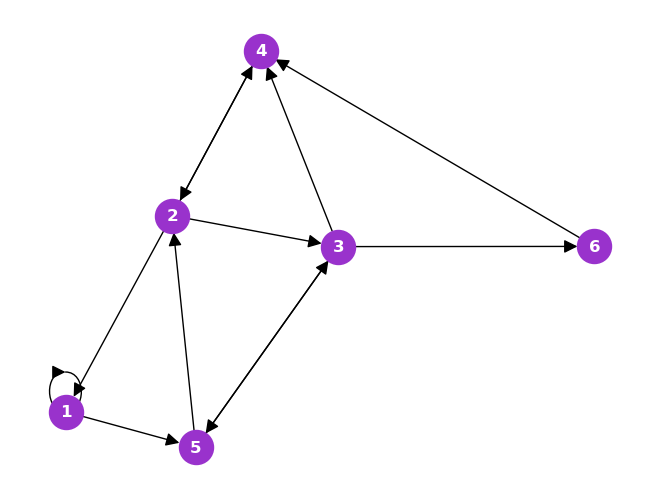

In [92]:
#(6c) Strongly Connected Case
g5_2=nx.DiGraph()
g5_2.add_edges_from([(1,1), (2,1), (2,3), (2,4), (4,2), (3,4), (3,5),(5,3), (1,5), (5,2),(3,6),(6,4)])

pos = nx.spring_layout(g4)
nx.draw(g5_2,
        pos,
        with_labels = True,
        node_color='darkorchid',
        node_size=600,
        font_color="white",
        font_weight='bold',
       arrowsize=20)

In [93]:
d_2=nx.diameter(g5_2)
d_2

4

## 2: Weighted Graph Exercise

### 2.1: Graph Making

In [94]:
import pandas as pd

DF_edges = pd.DataFrame([['b', 'a','60'],
 ['a', 'c','50'],
 ['a', 'd','100'],
 ['a', 'e','80'],
 ['a', 'g','70'],
 ['b', 'c','20'],
 ['g', 'i','70'],
 ['g', 'c','40'],
 ['h', 'i','20'],
 ['i', 'd','60'],
 ['i', 'j','60'],
 ['d', 'e','5'],
 ['e', 'k','10'],
 ['f', 'l','50'],
 ['f', 'k','25'],
 ['j', 'k','80']],
columns=['node1', 'node2','weight'])

DF_edges["weight"] = DF_edges["weight"].astype(str).astype(float)

DF_edges

,node1,node2,weight
0,b,a,60.0
1,a,c,50.0
2,a,d,100.0
3,a,e,80.0
4,a,g,70.0
5,b,c,20.0
6,g,i,70.0
7,g,c,40.0
8,h,i,20.0
9,i,d,60.0


/opt/conda/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:312: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


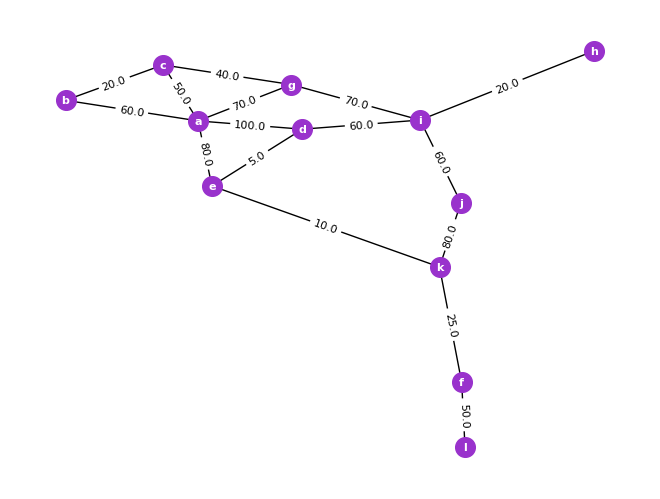

In [95]:
DF_graph=nx.Graph()
DF_graph=nx.from_pandas_edgelist(DF_edges, 'node1', 'node2', ['weight'])

pos = nx.spring_layout(DF_graph)
label_weight = nx.get_edge_attributes(DF_graph, "weight")

nx.draw(DF_graph,
        pos,
        with_labels = True,
        node_color='darkorchid',
        node_size=200,
        font_color="white",
        font_weight='bold',
        font_size=8,
        arrowsize=20)

nx.draw_networkx_edge_labels(DF_graph,pos=pos,edge_labels=label_weight,font_size=8)

plt.show()

In [96]:
#Max Weighted Value
DF_edges.iloc[DF_edges['weight'].idxmax()]

node1         a
node2         d
weight    100.0
Name: 2, dtype: object

In [97]:
#Min Weighted Value
DF_edges.iloc[DF_edges['weight'].idxmin()]

node1       d
node2       e
weight    5.0
Name: 11, dtype: object

### 2.2: Weight Interpretation

* __Street Network__: Nodes represent intersections, links are the streets, and the weights of the links represent the length in meters for each of the street segment.
In this case, __node "d" is closer to node "e" than "a"__, because the distance between them is just 5 meters, so these intersections are "closer".

* __Email Network__: Nodes represent students, links exist if emails exist between them and the weight of the link represents the number of total emails that have been exchanged.
In this case, __node "d" is closer to node "a" than "e"__, because they exchange the maximum number of emails, so we can infer that their relationship is "closer", since it is more intense.

### 2.3: Weighted Shortest Path

__2.3.1: Street Network__

Find the route for walking less meters between intersection "node b" and intersection "node g". In this case, the lower the weight value (street length), the shorter the distance in meters. So, we will use 'weight' column to calculate the shortest path.

In [98]:
street_sh_path_nodes = nx.shortest_path(DF_graph,source="b",target="g",weight='weight')
print(street_sh_path_nodes)

street_sh_path_edges = list(zip(street_sh_path_nodes,street_sh_path_nodes[1:]))
print(street_sh_path_edges)

['b', 'c', 'g']
[('b', 'c'), ('c', 'g')]


__2.3.2: Email Network__

Find the shortest path for spreading information from student "node b" to student "node g". Contrary to the previous case, here the higher weight (interaction) between two people, the closer they are to each other. So, we need to invert the weights of the edges to calculate the shortest path, and create a new column 'inv_weights'.

In [100]:
#Inverse weights:
inv_weights={(e1, e2):round(1./weight,7) for e1, e2, 
             weight in DF_graph.edges(data='weight')}
#round(1./weight,7): Calculate the inverse weight then round to 7 dp
#e1: Source node of the edge
#e2: Target node of the edge

#Add the inversed weight as an attribute to the edges in the graph
nx.set_edge_attributes(DF_graph, inv_weights, 'inv_weights')

#Print edge list with attributes
list(DF_graph.edges(data = True))[0:15]

[('b', 'a', {'weight': 60.0, 'inv_weights': 0.0166667}),
 ('b', 'c', {'weight': 20.0, 'inv_weights': 0.05}),
 ('a', 'c', {'weight': 50.0, 'inv_weights': 0.02}),
 ('a', 'd', {'weight': 100.0, 'inv_weights': 0.01}),
 ('a', 'e', {'weight': 80.0, 'inv_weights': 0.0125}),
 ('a', 'g', {'weight': 70.0, 'inv_weights': 0.0142857}),
 ('c', 'g', {'weight': 40.0, 'inv_weights': 0.025}),
 ('d', 'i', {'weight': 60.0, 'inv_weights': 0.0166667}),
 ('d', 'e', {'weight': 5.0, 'inv_weights': 0.2}),
 ('e', 'k', {'weight': 10.0, 'inv_weights': 0.1}),
 ('g', 'i', {'weight': 70.0, 'inv_weights': 0.0142857}),
 ('i', 'h', {'weight': 20.0, 'inv_weights': 0.05}),
 ('i', 'j', {'weight': 60.0, 'inv_weights': 0.0166667}),
 ('j', 'k', {'weight': 80.0, 'inv_weights': 0.0125}),
 ('k', 'f', {'weight': 25.0, 'inv_weights': 0.04})]

In [101]:
email_sh_path_nodes = nx.shortest_path(DF_graph,source="b",target="g", weight='inv_weights')
print(email_sh_path_nodes)

email_sh_path_edges = list(zip(email_sh_path_nodes,email_sh_path_nodes[1:]))
print(email_sh_path_edges)

['b', 'a', 'g']
[('b', 'a'), ('a', 'g')]


## 3: Quiz

### Q1: Airport Network

* __If  "DF_graph" is an airport network, where nodes represent airports, and the weight of the links is the normalised average flight time between them.__ 1) Find the aiports within the fastest route between the two less connected aiports.

In [112]:
DF_edges = pd.DataFrame([['b', 'a','60'],
 ['a', 'c','50'],
 ['a', 'd','100'],
 ['a', 'e','80'],
 ['a', 'g','70'],
 ['b', 'c','20'],
 ['g', 'i','70'],
 ['g', 'c','40'],
 ['h', 'i','20'],
 ['i', 'd','60'],
 ['i', 'j','60'],
 ['d', 'e','5'],
 ['e', 'k','10'],
 ['f', 'l','50'],
 ['f', 'k','25'],
 ['j', 'k','80']],
columns=['node1', 'node2','weight'])

DF_edges["weight"] = DF_edges["weight"].astype(str).astype(float)

DF_edges

,node1,node2,weight
0,b,a,60.0
1,a,c,50.0
2,a,d,100.0
3,a,e,80.0
4,a,g,70.0
5,b,c,20.0
6,g,i,70.0
7,g,c,40.0
8,h,i,20.0
9,i,d,60.0


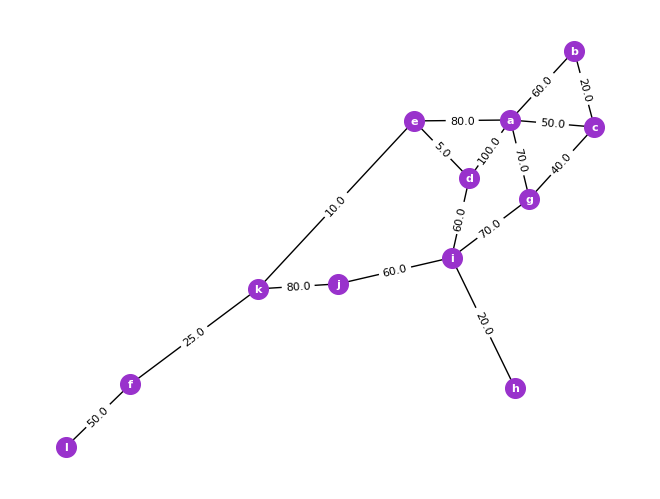

In [114]:
DF_graph=nx.Graph()
DF_graph=nx.from_pandas_edgelist(DF_edges, 'node1', 'node2', ['weight'])

pos = nx.spring_layout(DF_graph)
label_weight = nx.get_edge_attributes(DF_graph, "weight")

nx.draw(DF_graph,
        pos,
        with_labels = True,
        node_color='darkorchid',
        node_size=200,
        font_color="white",
        font_weight='bold',
        font_size=8,
        arrowsize=20)

nx.draw_networkx_edge_labels(DF_graph,pos=pos,edge_labels=label_weight,
                             font_size=8)

plt.show()

In [116]:
#Step 1: Find the two less connected airports through their unweighted degree
deg=nx.degree(DF_graph)
deg
#Answer: The less connected airports are 'h' and 'l'

DegreeView({'b': 2, 'a': 5, 'c': 3, 'd': 3, 'e': 3, 'g': 3, 'i': 4, 'h': 1, 'j': 2, 'k': 3, 'f': 2, 'l': 1})

In [117]:
#Step 2: Find the shortest path between the two airports...
#...through non-inverse weights
air_sh_path_nodes = nx.shortest_path(DF_graph,
                                        source="h",target="l",weight='weight')
print(air_sh_path_nodes)

['h', 'i', 'd', 'e', 'k', 'f', 'l']


### Q2: Social Network A

* __If  "DF_graph" is a social network, where nodes represent people, and the weight of the links is the total number of calls between them.__ 2)  Who are the people within the channel of communication that would transfer the information faster between the two with the higher number of contacts?

In [118]:
#Step 1: Find the two more contact people through their unweighted degree

deg=nx.degree(DF_graph)
deg
#Answer: The less connected airports are 'a' and 'i'

DegreeView({'b': 2, 'a': 5, 'c': 3, 'd': 3, 'e': 3, 'g': 3, 'i': 4, 'h': 1, 'j': 2, 'k': 3, 'f': 2, 'l': 1})

In [119]:
#Step 2: Compute inverse weights 

inv_weights={(e1, e2):round(1./weight,7) for e1, e2, 
             weight in DF_graph.edges(data='weight')}
#round(1./weight,7): Calculate the inverse weight then round to 7 dp
#e1: Source node of the edge
#e2: Target node of the edge

#Add the inversed weight as an attribute to the edges in the graph
nx.set_edge_attributes(DF_graph, inv_weights, 'inv_weights')

#Print edge list with attributes
list(DF_graph.edges(data = True))[0:15]

[('b', 'a', {'weight': 60.0, 'inv_weights': 0.0166667}),
 ('b', 'c', {'weight': 20.0, 'inv_weights': 0.05}),
 ('a', 'c', {'weight': 50.0, 'inv_weights': 0.02}),
 ('a', 'd', {'weight': 100.0, 'inv_weights': 0.01}),
 ('a', 'e', {'weight': 80.0, 'inv_weights': 0.0125}),
 ('a', 'g', {'weight': 70.0, 'inv_weights': 0.0142857}),
 ('c', 'g', {'weight': 40.0, 'inv_weights': 0.025}),
 ('d', 'i', {'weight': 60.0, 'inv_weights': 0.0166667}),
 ('d', 'e', {'weight': 5.0, 'inv_weights': 0.2}),
 ('e', 'k', {'weight': 10.0, 'inv_weights': 0.1}),
 ('g', 'i', {'weight': 70.0, 'inv_weights': 0.0142857}),
 ('i', 'h', {'weight': 20.0, 'inv_weights': 0.05}),
 ('i', 'j', {'weight': 60.0, 'inv_weights': 0.0166667}),
 ('j', 'k', {'weight': 80.0, 'inv_weights': 0.0125}),
 ('k', 'f', {'weight': 25.0, 'inv_weights': 0.04})]

In [121]:
#Step 3: Find the shortest path between the two people...
#...through inverse weights

social_sh_path_nodes = nx.shortest_path(DF_graph,
                                        source="a",
                                        target="i", weight='inv_weights')

print(social_sh_path_nodes)

['a', 'd', 'i']


### Q3: Social Network B

* __If we have the same social network, but in this case the weight of the links is the distance in kilometers of where people live.__ 3) First find the total distance between the people that would spread the information faster between the two with the higher number of contacts.

In [130]:
#Calculate the shortest path

social_sh_path_nodes_2 = nx.shortest_path(DF_graph,
                                          source="a",
                                          target="i", weight='weight')
print(social_sh_path_nodes_2)

['a', 'g', 'i']


### Q4: Social Network C

* __If we have the same social network, but in this case the weight of the links is the distance in kilometers of where people live.__ 4) Then find the shortest distance between the two most distant people in the network. 

In [131]:
#Calculate the diameter

nlen={}

for n in DF_graph.nodes():
    a=nx.single_source_dijkstra_path_length(DF_graph, n)
    nlen[n]=a
e = nx.eccentricity(DF_graph,sp=nlen)
d = nx.diameter(DF_graph, e)
d

225.0

### Q5: Trade Network

* __If "DF_graph" is a trade network, where nodes represent countries  and the weight of links is the ammount of good exchange.__ 5) Find the countries that trade the higher and the lower number of goods.

In [132]:
#Calculate the weighted degree for each node

deg=nx.degree(DF_graph, weight="weight")
deg

DegreeView({'b': 80.0, 'a': 360.0, 'c': 110.0, 'd': 165.0, 'e': 95.0, 'g': 180.0, 'i': 210.0, 'h': 20.0, 'j': 140.0, 'k': 115.0, 'f': 75.0, 'l': 50.0})